<a href="https://colab.research.google.com/github/YMKO-lab/End-to-End-Book-Recommendation-System/blob/main/end_to_end_book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 0: Import Libraries**

In [1]:
!pip install scikit-learn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Step 1: Import Data**

In [2]:
!unzip '/content/drive/MyDrive/Data for ML DeepLearning AI/book_archive.zip'

Archive:  /content/drive/MyDrive/Data for ML DeepLearning AI/book_archive.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


In [3]:
import zipfile

books = pd.read_csv('Books.csv')
books.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users = pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


##**Data Cleaning**

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


This particular DataFrame has 271360 rows and 8 columns, as indicated by the RangeIndex and DataColumns attributes.

The data type of each column is object, which indicates that each value in the column can be any type of data.



Now we are going to drop columns in the books dataframe that will not contribute to the model.

In [7]:
books.drop(['Image-URL-S'], axis=1, inplace=True)


In [8]:
books.drop(['Image-URL-M'], axis=1, inplace=True)

In [9]:
books.drop(['Image-URL-L'], axis=1, inplace=True)

In [10]:
books.drop(['Year-Of-Publication', 'Book-Author'], axis=1, inplace=True)


In [11]:
# let's check books info()
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ISBN        271360 non-null  object
 1   Book-Title  271360 non-null  object
 2   Publisher   271358 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [12]:
# let's remove the 'Publisher' as well
books.drop(['Publisher'], axis=1, inplace=True)

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ISBN        271360 non-null  object
 1   Book-Title  271360 non-null  object
dtypes: object(2)
memory usage: 4.1+ MB


In [14]:
# View the books dataframe
books.head()

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


#**Step 2: Exploratory Data Analysis**

Exploratory data analysis (EDA) is a type of data analysis that involves summarizing, visualizing, and identifying patterns and trends in data. The goal of EDA is to help analysts understand and make sense of large and complex datasets, and to identify potential relationships and trends that can be further investigated.

Feature engineering, on the other hand, is the process of extracting and creating new features from existing data. This can be done by combining, transforming, or selecting existing data in order to create new features that are more useful or informative for a particular analysis or model.

### Books 

In [15]:
# load the books dataframe
books.head()

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


In [16]:
# lets check for any missing values
books.isnull().sum()

ISBN          0
Book-Title    0
dtype: int64

There are no missing values.

In [17]:
# Check for if the duplicate books
books.duplicated().sum()


0

In [18]:
# check for similar books
books.isin(['ISBN']).sum()

ISBN          0
Book-Title    0
dtype: int64

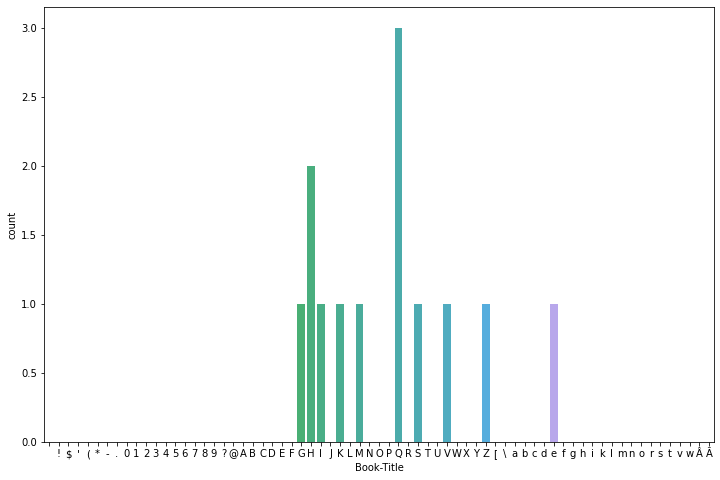

In [19]:
# Bar chart that shows the distribution of book titles by their first letter.
plt.figure(figsize=(12, 8))
sns.countplot(x='Book-Title', data=books, order=books['Book-Title'].str[0].sort_values().unique())

### Ratings

In [20]:
# Load ratings dataframe
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [21]:
# Check for any missing values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Users

In [22]:
# load the users dataframe
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
# check for any missing values
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [24]:
# We will remove the 'Age' column due to the missing values
users.drop(['Age'], axis=1, inplace=True)

In [25]:
users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [26]:
# Get the shape of the datasets
print(books.shape), print(users.shape), print(ratings.shape)

(271360, 2)
(278858, 2)
(1149780, 3)


(None, None, None)

## Feature Engineering



### book_ratings 

In [27]:
book_ratings = books.merge(ratings, on = 'ISBN')

In [28]:
# view book_ratings
book_ratings.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0195153448,Classical Mythology,2,0
1,0002005018,Clara Callan,8,5
2,0002005018,Clara Callan,11400,0
3,0002005018,Clara Callan,11676,8
4,0002005018,Clara Callan,41385,0


### user_ratings

In [29]:
# merge users and ratings on the columns 'User-ID'
user_ratings = users.merge(ratings, on = 'User-ID')

In [30]:
# view user_ratings
user_ratings.head()

,User-ID,Location,ISBN,Book-Rating
0,2,"stockton, california, usa",0195153448,0
1,7,"washington, dc, usa",034542252,0
2,8,"timmins, ontario, canada",0002005018,5
3,8,"timmins, ontario, canada",0060973129,0
4,8,"timmins, ontario, canada",0374157065,0


###**Now we will create two new dataframes that will have the average ratings for each book**

In [31]:
book_num_ratings = book_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'Num-Ratings'})
book_avg_ratings = book_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index().rename(columns = {'Book-Rating': 'Avg-Rating'})


In [32]:
# view book_num_ratings
book_num_ratings.head()

,Book-Title,Num-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [33]:
# view book_avg_ratings
book_avg_ratings.head()

,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [34]:
# merge the two new dataframes
final_rating = book_num_ratings.merge(book_avg_ratings, on = 'Book-Title')

In [35]:
# view final_rating
final_rating.head() 

,Book-Title,Num-Ratings,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


Now to find which books are popular.

We will select only those books with more that 250 ratings.

In [36]:
popular_books = final_rating[final_rating['Num-Ratings']>250].sort_values(by = 'Avg-Rating', ascending=False).reset_index(drop=True).head(50)

In [37]:
popular_books.head(20)

,Book-Title,Num-Ratings,Avg-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
4,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
5,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
6,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
7,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
8,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
9,To Kill a Mockingbird,510,4.700000


#**Step 3: Colaborative Filtering**

Collaborative filtering is a method of making recommendations based on the preferences of a group of users. It works by looking at the preferences of a group of users and using that information to make recommendations to individual users within that group.

In [38]:
# Select users who have given more than 200 ratings
x = book_ratings.groupby('User-ID').count()['Book-Rating'] > 200
educated_users = x[x].index 

# select ratings from 'educated' users only
book_ratings = book_ratings[book_ratings['User-ID'].isin(educated_users)]

# select books that have recieved more than 50 ratings
y = book_ratings.groupby('Book-Title')['Book-Rating'].count() >=50
famous_books = y[y].index

# create a new variable called final and then
# select ratings for 'famous' books only
final = book_ratings[book_ratings['Book-Title'].isin(famous_books)]

In [39]:
# view final dataframe
final.head()

,ISBN,Book-Title,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,11676,9
33,0399135782,The Kitchen God's Wife,36836,0
34,0399135782,The Kitchen God's Wife,46398,9
38,0399135782,The Kitchen God's Wife,113270,0
39,0399135782,The Kitchen God's Wife,113519,0


The next step is to create a pivot table that will have 'Book-Title' as the index, 'User-ID
as the column and 'Booking-Rating' as the value.

In [40]:
# creating a pivot table using data from the 'final' dataframe
# the pivot table will have book titles as the index
# and book ratings as the values. Any missing values will be filled in with 0

pt = final.pivot_table(index = 'Book-Title' , columns = 'User-ID' , values= 'Book-Rating').fillna(0)

In [41]:
# view 'pt'
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next we will calculate the similarity score between each book using **cosine_similarity()** function.

5 books with the highest similarity scores will be recommended.

In [42]:
# this will load the cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity

# the 'pt' we created above will be passed through
# the cosine_similarity
similarity_scores = cosine_similarity(pt)

# print the resulting similarity matrix
print(similarity_scores)

[[1.         0.10255025 0.01220856 ... 0.12110367 0.07347567 0.04316046]
 [0.10255025 1.         0.2364573  ... 0.07446129 0.16773875 0.14263397]
 [0.01220856 0.2364573  1.         ... 0.04558758 0.04938579 0.10796119]
 ...
 [0.12110367 0.07446129 0.04558758 ... 1.         0.07085128 0.0196177 ]
 [0.07347567 0.16773875 0.04938579 ... 0.07085128 1.         0.10602962]
 [0.04316046 0.14263397 0.10796119 ... 0.0196177  0.10602962 1.        ]]


In [43]:
# Find the index of the book in the pivot table
np.where(pt.index == '1984')[0][0]

0

In [44]:
# Lets find the index of the book in the pivot table
np.where(pt.index == 'Zoya')[0][0]

704

In [45]:
sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1], reverse=True)[1:6]

[(47, 0.2702651417103732),
 (545, 0.2639619371123496),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286)]

In [46]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [47]:
# This is function that will recommed the top 5 similar books

def recommend(book_name):
  # Find the index of the book in the pivot table
  index = np.where(pt.index == book_name)[0][0]
  

  # sort the list of similar books by their similarity scores,
  # in descending order. Then, get the top 5 books (after the original book)
  # with the highest similarity
  similar_books = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse =True)[1:6]

  # print the names of the top 5 similar books
  for i in similar_books:
    print(pt.index[i[0]])

In [48]:
# Lets try it out
recommend("4 Blondes")

The House of the Spirits
Pride and Prejudice
Pleading Guilty
Seabiscuit
Notes from a Small Island


In [49]:
recommend("Harry Potter and the Prisoner of Azkaban (Book 3)")

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [50]:
recommend("I'll Be Seeing You")

You Belong To Me
Let Me Call You Sweetheart
Daddy's Little Girl
Before I Say Good-Bye
On the Street Where You Live


#**Step 4: Saving the model**

In [51]:
import pickle
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity.pkl', 'wb'))
pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(popular_books, open('popular.pkl', 'wb'))